<img src="header.png" align="left"/>

# Exercise: Classification of MNIST (10 points)


Die goal of this exercise is to work on the improvement of a model and how to debug and check the training data.
We start with a simple model for digit classification of the MNIST dataset [1].  This dataset contains 60,000 scans of digits for training and 10,000 scans of digits for validation. A sample consists of 28x28 features with values between 0 and 255, note that the features are inverted. Actually digits are rather dark on a light background. MNIST digits are light on a dark background.
This example is partly based on a tutorial by Jason Brownlee [2]. 
Please follow the instructions in the notebook.


```
[1] http://yann.lecun.com/exdb/mnist/
[2] https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
```

**NOTE**

Document your results by simply adding a markdown cell or a python cell (as comment) and writing your statements into this cell. For some tasks the result cell is already available.




In [14]:
#
# Import some modules
#
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#
# Turn off errors and warnings (does not work sometimes)
#
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)

#
# Diagram size
#
plt.rcParams['figure.figsize'] = [16, 9]

# Load and prepare data

In [16]:
#
# Loading of the data (very simplified) with split into train and test data (fixed split)
#
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [18]:
#
# Print shapes of data
#
print('training data: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('test     data: X=%s, y=%s' % (x_test.shape, y_test.shape))

training data: X=(60000, 28, 28), y=(60000,)
test     data: X=(10000, 28, 28), y=(10000,)


In [ ]:
#
# Display some examples of the data
#
for i in range(15):
    plt.subplot(4,4,1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [21]:
#
# Display labels of some data
#
for i in range(15):
    print('label {}'.format(y_train[i]))

label 5
label 0
label 4
label 1
label 9
label 2
label 1
label 3
label 1
label 4
label 3
label 5
label 3
label 6
label 1


# Task: Plot a histogram of the classes of the training data (1 point)

After plotting, give a short estimation if this distribution is OK for use in a classification situation.

In [ ]:
#
# Histogram of class counts (digits)
#

plt.hist(y_train)
    

In [24]:
# Result: The distribution is OK for classifcation. There is a slight bias towards favoring the digit 1 and neglecting the digit 5

# Prepare data for classification

In [26]:
# 
# Change shape of data for model
#

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [28]:
# 
# Scale pixel values into range of 0 to 1
#
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [30]:
# 
# One-hot encoding for classes
#
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the first model

In [32]:
#
# Simple CNN model
#
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10 )

In [15]:
model.predict(x_train[:1])

array([[6.2119955e-11, 1.7615613e-13, 1.3226202e-11, 5.0272087e-05,
        4.8994244e-16, 9.9994969e-01, 1.1295199e-12, 7.8691489e-14,
        3.7339055e-11, 2.9221272e-09]], dtype=float32)

In [17]:
y_train[:1]

array([5], dtype=uint8)

In [19]:
#
# Measure the accuracy
#
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('accuracy {:.5f}'.format(acc))

ValueError: in user code:

    /home/daniel/dev/ai-research/mlexercises/.venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1224 test_function  *
        return step_function(self, iterator)
    /home/daniel/dev/ai-research/mlexercises/.venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/daniel/dev/ai-research/mlexercises/.venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/daniel/dev/ai-research/mlexercises/.venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/daniel/dev/ai-research/mlexercises/.venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/daniel/dev/ai-research/mlexercises/.venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1208 run_step  **
        outputs = model.test_step(data)
    /home/daniel/dev/ai-research/mlexercises/.venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1174 test_step
        y_pred = self(x, training=False)
    /home/daniel/dev/ai-research/mlexercises/.venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /home/daniel/dev/ai-research/mlexercises/.venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 28, 28]


In [22]:
#
# Estimate the number of false classifications in production use
#
print('with {} samples there are about {:.0f} false classifications to expect.'.format( x_test.shape[0], (x_test.shape[0]*(1-acc))))

NameError: name 'acc' is not defined

# Print out training

In [25]:
#
# Plot loss and accuracy
#
def summarize_diagnostics(history,modelname):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='green', label='train')
    plt.subplots_adjust(hspace=0.5)
    plt.savefig( 'results/' + modelname + '_plot.png')
    plt.show()
    plt.close()

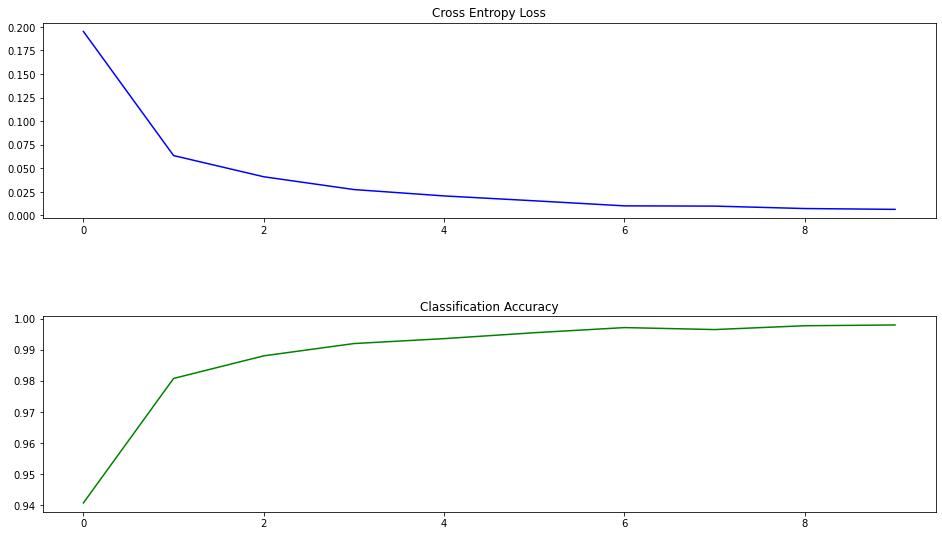

In [27]:
summarize_diagnostics(history,'01_model1')

# Task: Repeat the training until you see overfitting (2 points)

Change the training parameter (epochs) of the simple model until you see overfitting. Dokument the number of epochs from which on you see overfitting.

**Note** make sure to restart training from epoch 0 and not to continue training of the model.

In [29]:
# Result: At around the 8th epoch, overfitting starts to occur.

# Task: Improve the model significantly (3 points)

Your customer requires to have less than 1% of wrong classifications. Start to build a better model with significantly less than 100 wrong classifications in the 10000 test samples. Research the internet for the optimal model setup for MNIST classification and try to replicate this model here. Make sure to document the source where you found the hints for the improvement (link).

In [31]:
#
# Setup new model
#

# https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

# Some notes
# Activatino Function: rectified linear unit (relu).
# 32/64 in keras lang. is "filter", another name is "neurons" or "perceptons". naming stuff is hard
# difference between conv2d and dense layer: former is for local patterns, the latter is for globa patterns
# the image is split into parts of size (3,3)


model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # creates a convolutional kernel that outputs with 32 output dimensions
model2.add(MaxPooling2D((2, 2))) # downsamples input feature maps by findnig maximum in order to reduce number of uneeded params
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform')) # new covnet layer
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform')) # new covnet layer

model2.add(Flatten())
model2.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) # Dense Layer: fully connected,
model2.add(Dense(10, activation='softmax')) # Dense Layer: returns probability array for each digit
	


In [33]:
# compile
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
# train with history
history = model2.fit(x_train, y_train, batch_size=64, epochs=15 )

Epoch 1/15
938/938 [==============================] - 24s 25ms/step - loss: 0.1006 - accuracy: 0.9692
Epoch 2/15
938/938 [==============================] - 24s 26ms/step - loss: 0.0338 - accuracy: 0.9894
Epoch 3/15
938/938 [==============================] - 23s 24ms/step - loss: 0.0225 - accuracy: 0.9926
Epoch 4/15
938/938 [==============================] - 22s 24ms/step - loss: 0.0154 - accuracy: 0.9951
Epoch 5/15
938/938 [==============================] - 22s 24ms/step - loss: 0.0130 - accuracy: 0.9954
Epoch 6/15
938/938 [==============================] - 20s 21ms/step - loss: 0.0101 - accuracy: 0.9969
Epoch 7/15
679/938 [====================>.........] - ETA: 5s - loss: 0.0081 - accuracy: 0.9975

In [2404]:
#
# Measure the accuracy
#
_, acc = model2.evaluate(x_test, y_test, verbose=0)
print('Accuracy {:.5f}'.format(acc))

Accuracy 0.99160


In [2405]:
#
# Estimate the number of false classifications in production use
#
print('with {} samples there are about {:.0f} false classifications to expect.'.format( x_test.shape[0], (x_test.shape[0]*(1-acc))))

with 10000 samples there are about 84 false classifications to expect.


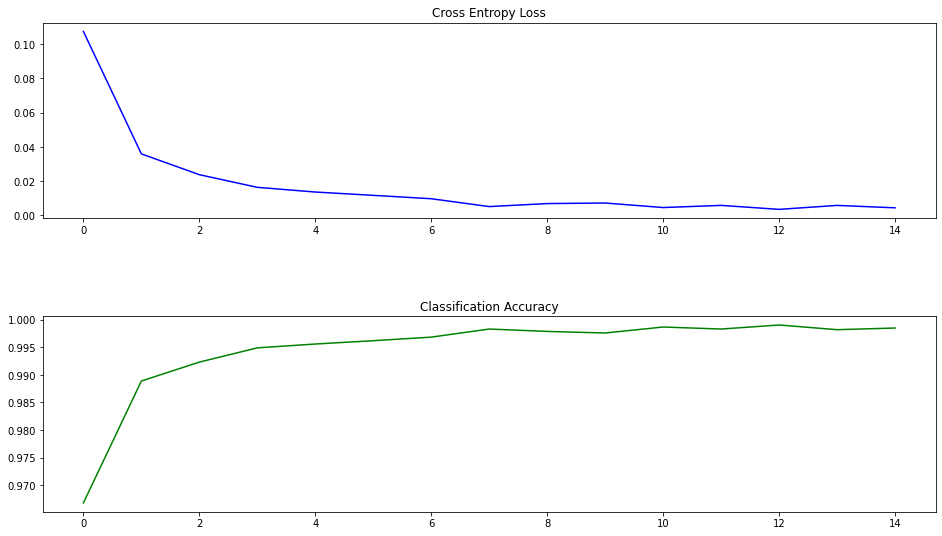

In [2406]:
summarize_diagnostics(history,'01_model2')

In [2407]:
# Result: (describe where you found the hints for improvement and how much it improved)

# Save the model

In [2408]:
#
# Save a model for later use
#
from keras.models import model_from_json

prefix = 'results/01_'
modelName = prefix + "model.json"
weightName = prefix + "model.h5"

# set to True if the model should be saved
save_model = True
if save_model:
    model_json = model2.to_json()
    with open( modelName , "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model2.save_weights( weightName )
    print("saved model to disk as {} {}".format(modelName,weightName))

    
# load model (has to be saved before, is not part of git)    
if not save_model:
    json_file = open(modelName, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(weightName)
    print("loaded model from disk")
    


saved model to disk as results/01_model.json results/01_model.h5


# Task: Find characteristics in the errors of the model (2 points)

There are still too many false classifications using the model. Evaluate all test data and plot examples of failed classifications to get a better undestanding what goes wrong. Plot also the count of false classifications per class. Select one class of digits that you want to improve. You can also plot a confusion matrix to get a better insight.

**Note**: Be aware that this type of debugging may create a bias which may seamingly increase the quality of the model in relation to the test data. But compared to the distribution of the real-world data the quality of the model can still be insufficient. We will handle this topic in the lecture. 

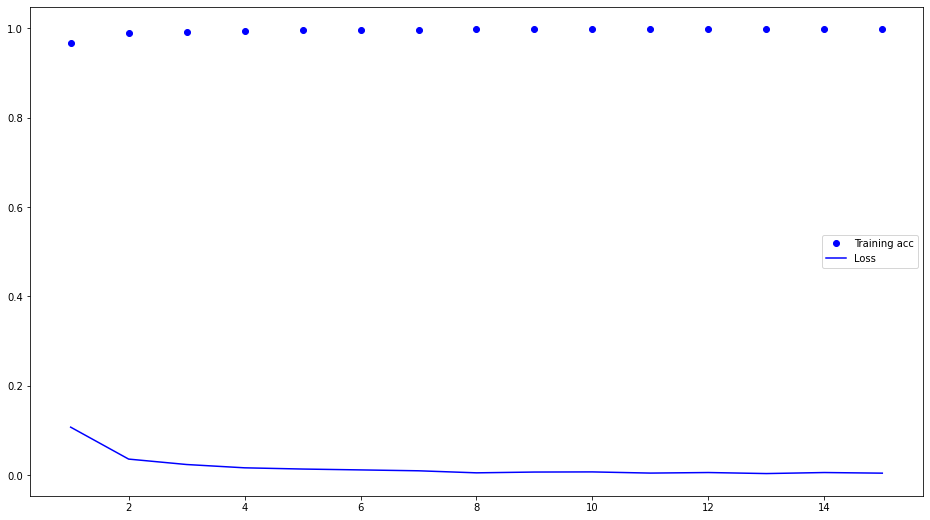

<Figure size 1152x648 with 0 Axes>

In [2417]:
#
# Plot 9 examples of digits which where classified wrong (also show true vs wrong class)
#

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, loss, 'b', label='Loss')
plt.legend()
plt.figure()

plt.show()


In [2410]:
#
# Plot distribution of errors per class (digit)
#

In [2411]:
#
# Bonus: plot confusion matrix for test data
#

In [2412]:
# Result: (which digit did you select for improvement)

# Task: Update your training strategy (2 points)

Beside many other options, there are two possible ways to improve your model:

1. Add more data for those classes which are poorely classified
1. Add augmentation for the training data

Select **one** of the two strategies and implement it. Test if there is an improvement.

## More training data

Find the EMNIST dataset in the internet and load 200 examples of the digit with the most errors (from last task).
If you have used the confusion matrix, select also digits from the other class (where the most wrong digits from the selected class landed).
Extend the current training set with those images and labels and retrain your model.
Document the resulting accuracy.


## Augmentation

Search the internet for the ImageDataGenerator class of the Keras framework and implement such a generator for the training of the model. Select suitable augmentation which fits to the use-case. 
Document the resulting accuracy.



In [2413]:
#
# Implement your strategy
#

In [2414]:
# Result: (used strategy and resulting accuracy on test data)